In [1]:
# dependencies
using PyPlot

In [2]:
# define constants:
L = 2*pi;
beta = sqrt(2)+1;

In [3]:
# define initial condition and its Fourier transform:
# function q0(x)
#    if (x>L/3 and x<2*L/3):
#         return 1
#     else:
#         return 0
#     end
# end
# q0hat(la) = quadgk(q0(x)*exp(-im*x*la), x, 0, L);

# instead give the Fourier transform directly.
# Here we use FT of the box described above.
# q0hat(la) = -2/L*exp(-im*L*la/2)*sin(la*L/6);

# this is q0hat for the step function 1 iff x>L/2, with L=2*pi:
q0hat(la) = - im*exp(-2*im*la*pi)*(-1+exp(im*la*pi)) / la;

In [4]:
# define integrand:
Delta(la) = 2*(1+beta^2)*cos(L*la) - 4*beta;
zetap(la) = (2*beta-(1+beta^2)*exp(im*la*L))*q0hat(la) + (beta^2-1)*exp(-im*L*la)*q0hat(-la)
zetam(la) = (1+beta^2-2*beta*exp(im*L*la))*q0hat(la) + (beta^2-1)*q0hat(-la);

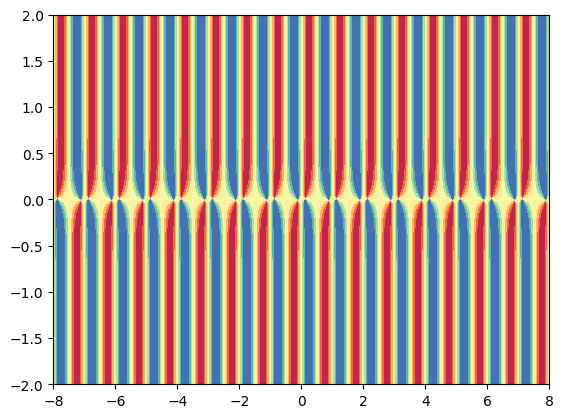

PyObject <matplotlib.contour.QuadContourSet object at 0x320e0ee90>

In [5]:
# plot showing zeros of Delta
x = linspace(-8,8,1000); y = linspace(-2,2,1000);
zarg = [sin(angle(Delta(xx+im*yy))) for yy in y, xx in x];
contourf(x, y, zarg, cmap=get_cmap("Spectral"))

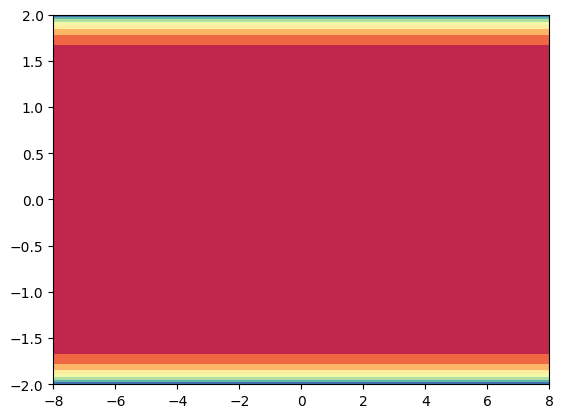

PyObject <matplotlib.contour.QuadContourSet object at 0x326ec3d90>

In [6]:
# plot showing abs of Delta
x = linspace(-8,8,1000); y = linspace(-2,2,1000);
zabs = [abs(Delta(xx+im*yy)) for yy in y, xx in x];
contourf(x, y, zabs, cmap=get_cmap("Spectral"))

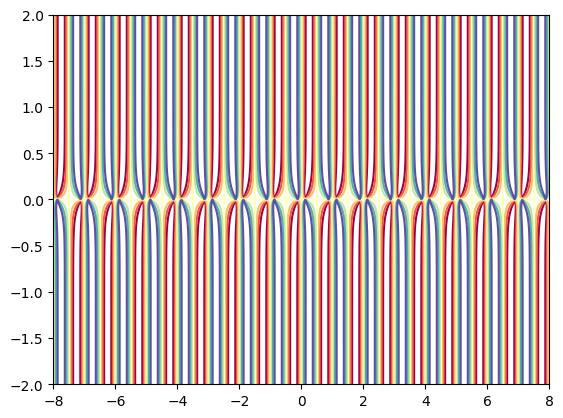

PyObject <matplotlib.contour.QuadContourSet object at 0x3293e6550>

In [7]:
p1=contour(x, y, zarg, cmap=get_cmap("Spectral"))

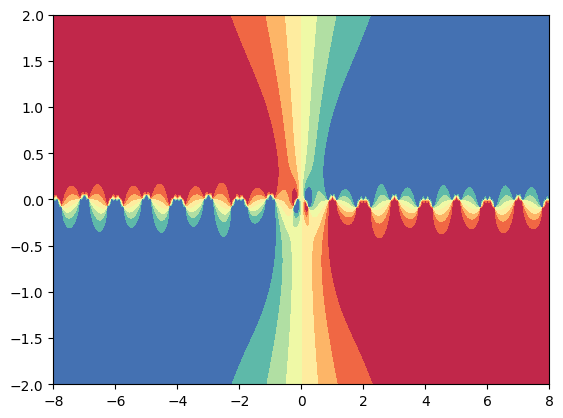

PyObject <matplotlib.contour.QuadContourSet object at 0x32b93a250>

In [8]:
# plot showing argument of of zetam/Delta
x = linspace(-8,8,1000); y = linspace(-2,2,1000);
zarg = [sin(angle(zetam(xx+im*yy)/Delta(xx+im*yy))) for yy in y, xx in x];
contourf(x, y, zarg, cmap=get_cmap("Spectral"))

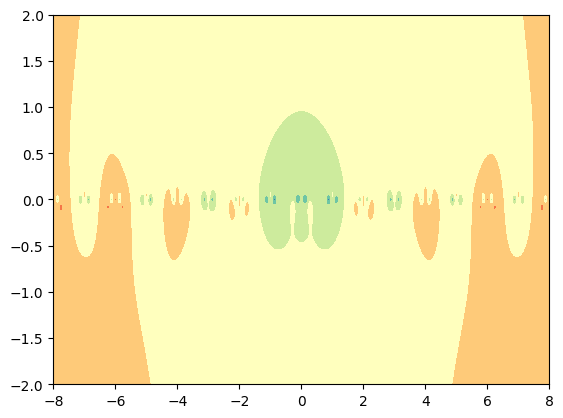

PyObject <matplotlib.contour.QuadContourSet object at 0x32e5f12d0>

In [9]:
# plot showing log(abs(zetam/Delta))
x = linspace(-8,8,1000); y = linspace(-2,2,1000);
zabs = [log(abs(zetam(xx+im*yy)/Delta(xx+im*yy))) for yy in y, xx in x];
contourf(x, y, zabs, cmap=get_cmap("Spectral"))

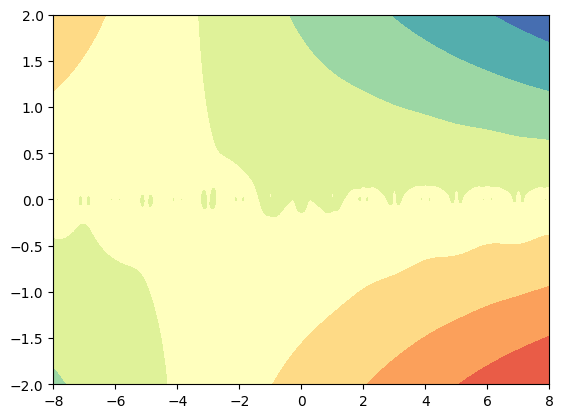

PyObject <matplotlib.contour.QuadContourSet object at 0x330b12490>

In [10]:
# plot showing log(abs(myintegrand))
x = linspace(-8,8,1000); y = linspace(-2,2,1000);
myx=0.3; myt=0.8;
intgr=[log(abs(exp(im*(xx+im*yy)*(myx-L)) * exp(-im*myt*(xx+im*yy)^2) * zetam((xx+im*yy)) / Delta((xx+im*yy)))) for yy in y, xx in x];
contourf(x, y, intgr, cmap=get_cmap("Spectral"))

In [11]:
# test numerical integration. Should return 1*im
myintegr(z) = exp(z)/z^5;
quadgk(myintegr,1+1*im,-1+1*im,-1-1*im,1-1*im,1+1*im;abstol=0.0000001)[1]*12/pi

0.0 + 0.9999999999999993im

In [13]:
# define functions for integration
mypolecount=100; # evaluation will be done at (4* this number) + 2 poles
pl1 = [pi*(8*m-1)/(4*L) for m in -mypolecount:mypolecount]
pl2 = [pi*(8*m+1)/(4*L) for m in -mypolecount:mypolecount]
pl = [pl1 pl2]'[:];

cntrngon = 8;
mypath = [0 + 1*exp(im*th*2*pi) for th in linspace(0,1,cntrngon+1)];
mypath[end]=mypath[1];

myrad  = [0.005/(abs(m)+0.05) for m in pl ];

myintegrandp(x,t,la) = exp(im*la*x) * exp(-im*t*la^2) * zetap(la) / Delta(la);

q(x,t) = sum([(quadgk(la -> myintegrandm(x,t,la), pl[m]+myrad[m]*mypath...)[1]) for m in 1:length(pl)])/(-2*pi)

# this specifies absolute tolerence, which does not seem to affect speed, but could potentially be used to improve speed at cost of accuracy.
# q(x,t) = sum([(quadgk(la -> myintegrandm(x,t,la), pl[m]+myrad[m]*mypath...; abstol=0.0000000000001)[1]) for m in 1:length(pl)])/(-2*pi)

q (generic function with 1 method)

In [183]:
T = 2*pi;
Xsteps = 501;
X = linspace(0,L,Xsteps);
Q = q(X,T);
absQ = abs(Q);

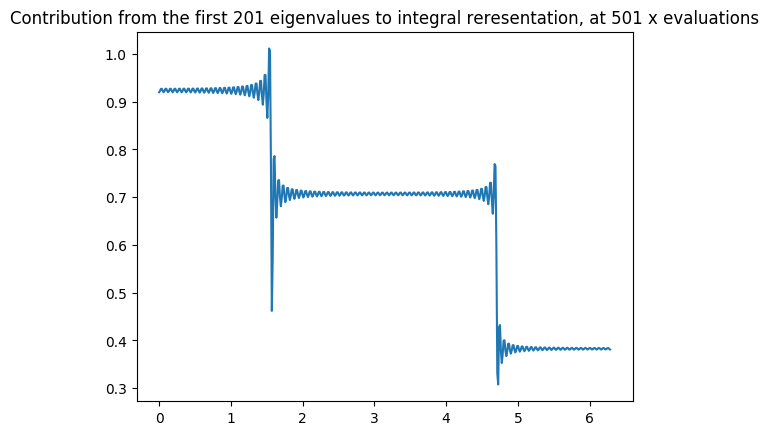

PyObject <matplotlib.text.Text object at 0x7f16bd167150>

In [184]:
plot(X,absQ)
title("Contribution from the first "*string(mypolecount*2+1)*" eigenvalues to integral reresentation, at "*string(Xsteps)*" x evaluations")

## Sum series as in Natalie's Mathematica example

In [178]:
# define the poles to sum over

L = 2*pi;

mypolecount=100; # evaluation will be done at (4* this number) + 2 poles
pl1 = [pi*(8*m-1)/(4*L) for m in -mypolecount:mypolecount]
pl2 = [pi*(8*m+1)/(4*L) for m in -mypolecount:mypolecount]
pl = [pl1 pl2]'[:];
plm = pl[1:floor(Int,length(pl)/2)];
plp = pl[floor(Int,length(pl)/2+1):end];

In [179]:
# define q(x,t) in  terms of the summands

summandm(x,t,z) = exp(im*z*(x-L)-im*z^2*t) * ((exp(im*L*z)*(-2-sqrt(2))+exp(2*im*L*z)*(1+sqrt(2)))*q0hat(z) - exp(im*L*z)*(1+sqrt(2))*q0hat(-z)) / (L*(2+sqrt(2))*(exp(2*im*L*z)-1));

summandp(x,t,z) = exp(im*z*x-im*z^2*t) * ((exp(im*L*z)*(-1-sqrt(2))+exp(2*im*L*z)*(2+sqrt(2)))*q0hat(z) - (1+sqrt(2))*q0hat(-z)) / (L*(2+sqrt(2))*(exp(2*im*L*z)-1));

qser(x,t) = sum([summandm(x,t,z) for z in plm]) + sum([summandp(x,t,z) for z in plp]);

In [51]:
# this was used for debug only

nataliesummandm(x,t,z) = exp(im*z*(pi+x-t*z)) * (im*(1+sqrt(2))-im*cos(pi*z)+(3+2*sqrt(2))*sin(pi*z)) / (2*(2+sqrt(2))*(1+exp(im*pi*z))*(1+exp(2*im*pi*z))*pi*z);

nataliesummandp(x,t,z) = im*exp(-im*z*(2*pi-x+t*z)) * (2+sqrt(2)+(1+sqrt(2))*exp(2*im*pi*z)*(-1+exp(im*pi*z))) / (2*(2+sqrt(2))*(1+exp(im*pi*z))*(1+exp(2*im*pi*z))*pi*z);

qser(x,t) = sum([nataliesummandm(x,t,z) for z in plm]) + sum([nataliesummandp(x,t,z) for z in plp]);

In [180]:
T = 2*pi;
Xsteps = 501;
X = linspace(0,L,Xsteps);
Qser = qser(X,T);
absQser = abs(Qser);

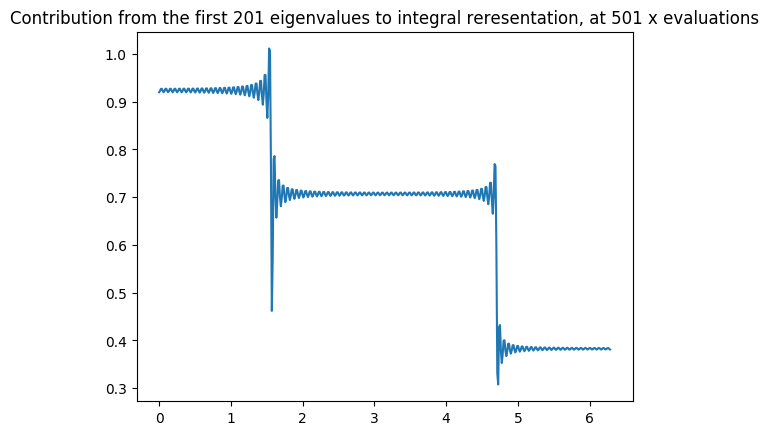

PyObject <matplotlib.text.Text object at 0x7f16bd21d9d0>

In [181]:
plot(X,absQser)
title("Contribution from the first "*string(mypolecount*2+1)*" eigenvalues to integral reresentation, at "*string(Xsteps)*" x evaluations")

## Compare series and integral evaluations

In [6]:
L = 2*pi;
beta = sqrt(2)+1;

In [9]:
# define functions for integration
mypolecount=100; # evaluation will be done at (4* this number) + 2 poles
pl1 = [pi*(8*m-1)/(4*L) for m in -mypolecount:mypolecount]
pl2 = [pi*(8*m+1)/(4*L) for m in -mypolecount:mypolecount]
# pl = [[pl1[1:7] pl1[end-6:end]]'[:] [pl2[1:7] pl2[end-6:end]]'[:]]'[:];
pl = [pl1 pl2]'[:];
plm = pl[1:floor(Int,length(pl)/2)];
plp = pl[floor(Int,length(pl)/2+1):end];

cntrngon = 8;
mypath = [0 + 1*exp(im*th*2*pi) for th in linspace(0,1,cntrngon+1)];
mypath[end]=mypath[1];

myrad  = [0.05/(abs(m)+0.1) for m in pl ];

Delta(la) = 2*(1+beta^2)*cos(L*la) - 4*beta;
zetap(la) = (2*beta-(1+beta^2)*exp(im*la*L))*q0hat(la) + (beta^2-1)*exp(-im*L*la)*q0hat(-la)
zetam(la) = (1+beta^2-2*beta*exp(im*L*la))*q0hat(la) + (beta^2-1)*q0hat(-la);
myintegrandp(x,t,la) = exp(im*la*x) * exp(-im*t*la^2) * zetap(la) / Delta(la);
q(x,t) = sum([(quadgk(la -> myintegrandp(x,t,la), pl[m]+myrad[m]*mypath...)[1]) for m in 1:length(pl)])/(-2*pi)

summandm(x,t,z) = exp(im*z*(x-L)-im*z^2*t) * ((exp(im*L*z)*(-2-sqrt(2))+exp(2*im*L*z)*(1+sqrt(2)))*q0hat(z) - exp(im*L*z)*(1+sqrt(2))*q0hat(-z)) / (L*(2+sqrt(2))*(exp(2*im*L*z)-1));
summandp(x,t,z) = exp(im*z*x-im*z^2*t) * ((exp(im*L*z)*(-1-sqrt(2))+exp(2*im*L*z)*(2+sqrt(2)))*q0hat(z) - (1+sqrt(2))*q0hat(-z)) / (L*(2+sqrt(2))*(exp(2*im*L*z)-1));
qser(x,t) = sum([summandp(x,t,z) for z in pl]);

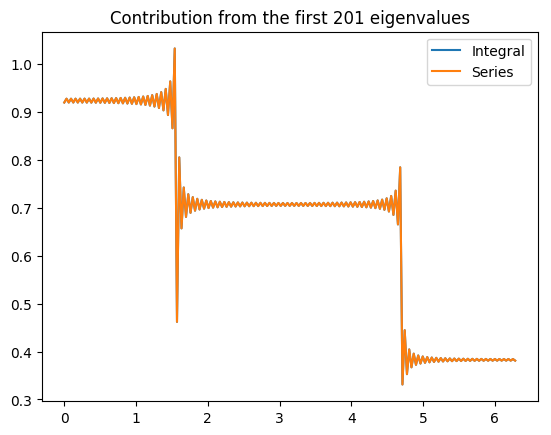

PyObject <matplotlib.legend.Legend object at 0x7f3502a85c10>

In [12]:
T = 2*pi;
Xsteps = 201;
X = linspace(0,L,Xsteps);

Qser = qser(X,T);
absQser = abs(Qser);

Q = q(X,T);
absQ = abs(Q);

plot(X,absQ, label="Integral")
plot(X,absQser, label="Series")
title("Contribution from the first "*string(mypolecount*2+1)*" eigenvalues")
legend()